## Importing Required Libraries and the Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
os.chdir('C:\\Users\\DELL\\Downloads\\Data Science with Python\\Shubham\\DS - Python _ Jul 28 - Sep 01 _ Shubham')

In [66]:
Train=pd.read_csv('titanic_train.csv')

In [4]:
Test=pd.read_csv('titanic_test.csv')

## Performing Exploratory Data Analysis of the Datasets

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
PassengerId    420 non-null int64
Pclass         420 non-null int64
Name           420 non-null object
Sex            420 non-null object
Age            334 non-null float64
SibSp          420 non-null int64
Parch          420 non-null int64
Ticket         420 non-null object
Fare           419 non-null float64
Cabin          91 non-null object
Embarked       420 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.2+ KB


## Inspection for missing values

In [9]:
Train.Age.isna().sum()

177

In [10]:
Train.Cabin.isna().sum()

687

In [11]:
Train.Embarked.isna().sum()

2

In [12]:
Train[Train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Analysing the data visually 
### Visualizing the Fare distribution of the passengers

Text(0, 0.5, 'Number of passengers')

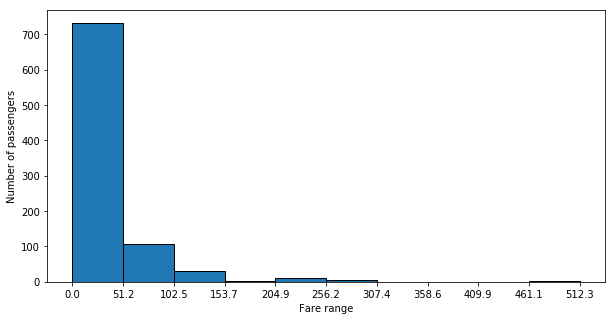

In [13]:
count,bin_edges=np.histogram(Train.Fare)
Train.Fare.plot.hist(xticks=bin_edges,figsize=(10,5),edgecolor="black")
plt.xlabel("Fare range")
plt.ylabel("Number of passengers")

### Visualizing the gender and age-wise survivorship 

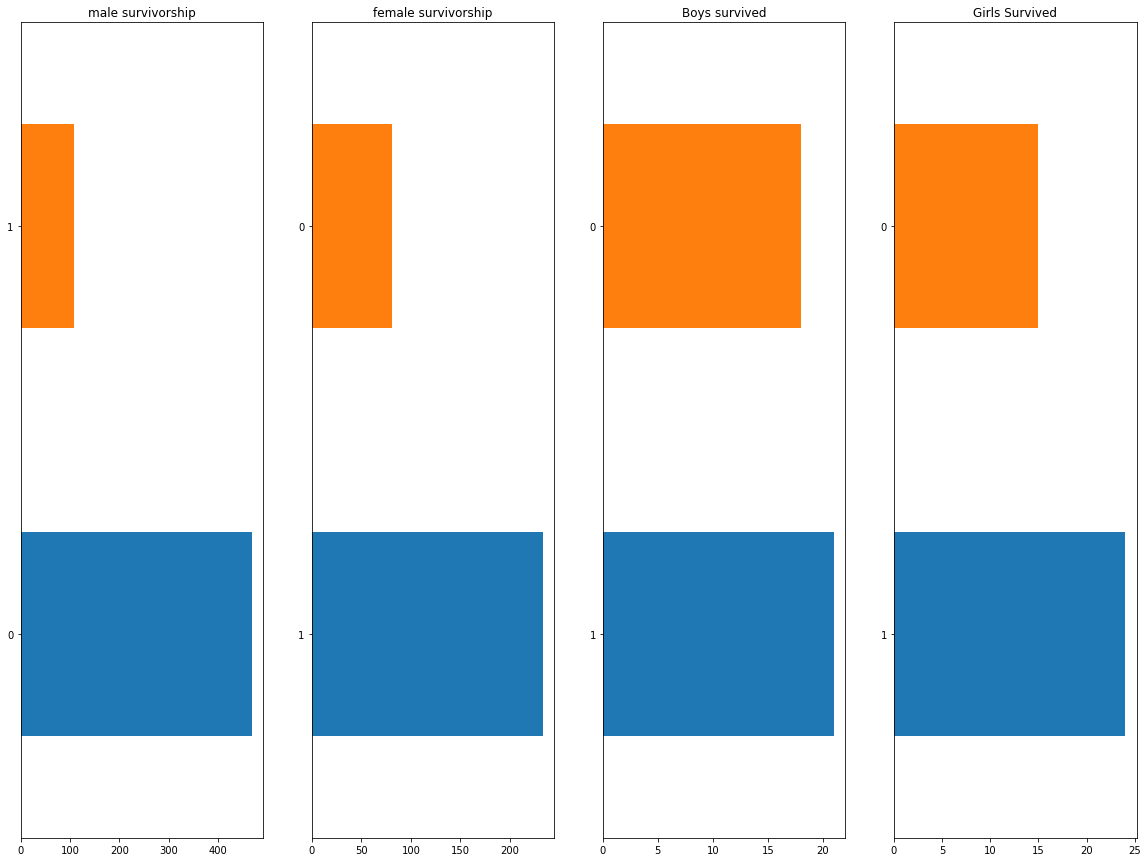

In [14]:
f,a=plt.subplots(1,4,figsize=(20,15))
Train[Train.Sex=='male'].Survived.value_counts().plot(kind="barh",ax=a[0],title="male survivorship")
Train[Train.Sex=='female'].Survived.value_counts().plot(kind="barh",ax=a[1],title="female survivorship")
Train[(Train.Age<15)&(Train.Sex=="male")].Survived.value_counts().plot.barh(ax=a[2],title="Boys survived")
Train[(Train.Sex=="female")&(Train.Age<15)].Survived.value_counts().plot.barh(ax=a[3],title="Girls Survived")

#### It can be seen that from among men,women, boys and girls the survivorship of female gender is more than that of male gender

In [15]:
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Extracting Titles of the passengers for the 'Train' dataset 

In [16]:
def get_title(name):
    if'.'in name:
        return name.split(',')[1].split(".")[0].strip()
    else:
        return "unknown"

In [17]:
Train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [67]:
Train["Titles"]=[x for x in Train.Name.apply(get_title)]

### Replacing the titles with the conventional ones

In [24]:
def replace_titles(y):
    x=y["Titles"]
    if x in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return "Mr"
    elif x in ['the Countess', 'Mme', 'Lady']:
        return "Mrs"
    elif x in ['Mlle', 'Ms']:
        return "Miss"
    elif x == "Dr":
        if y["Sex"]=="male":
            return "Mr"
        else:
            return "Mrs"
    else:
        return x

In [68]:
Train["Titles"]=Train.apply(replace_titles,axis=1)

In [69]:
Train.Titles.value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Titles, dtype: int64

# Imputation of missing values in the 'Train' dataset
#### The null values of the Age feature were imputed with the mean values after categorizing the observations based on their titles  

In [70]:
m_c=Train.Age[Train.Titles=="Master"].mean()

In [71]:
Train.Age[Train.Titles=="Master"]=Train.Age[Train.Titles=="Master"].fillna(m_c)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
m_m=Train.Age[(Train.Titles=="Mr")].mean()

In [73]:
Train.Age[(Train.Titles=="Mr")]=Train.Age[(Train.Titles=="Mr")].fillna(m_m)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
m_w=Train.Age[(Train.Titles=="Mrs")].mean()

In [75]:
Train.Age[(Train.Titles=="Mrs")]=Train.Age[(Train.Titles=="Mrs")].fillna(m_w)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
m_g=Train.Age[(Train.Titles=="Miss")].mean()

In [77]:
Train.Age[(Train.Titles=="Miss")]=Train.Age[(Train.Titles=="Miss")].fillna(m_g)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### The null values of the Cabin and Embarked features were imputed with the most occuring value, since the values are categorical in nature 

In [78]:
Train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [79]:
Train.Cabin=Train.Cabin.fillna('C23 C25 C27')

In [80]:
Train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [81]:
Train.Embarked=Train.Embarked.fillna("S")

In [82]:
Train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Titles         0
dtype: int64

## Extracting Titles of the passengers for the 'Test' dataset 

In [41]:
Test["Titles"]=[x for x in Test.Name.apply(get_title)]

### Replacing titles with the conventional ones 

In [42]:
Test["Titles"]=Test.apply(replace_titles,axis=1)

In [43]:
Test.Titles.value_counts()

Mr        246
Miss       79
Mrs        73
Master     21
Dona        1
Name: Titles, dtype: int64

### Imputation of missing values in the 'Test' dataset


In [44]:
m_c_t=Test.Age[Test.Titles=="Master"].mean()

In [45]:
Test.Age[Test.Titles=="Master"]=Test.Age[Test.Titles=="Master"].fillna(m_c_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
m_m_t=Test.Age[(Test.Titles=="Mr")].mean()

In [47]:
Test.Age[(Test.Titles=="Mr")]=Test.Age[(Test.Titles=="Mr")].fillna(m_m_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
m_w_t=Test.Age[(Test.Titles=="Mrs")].mean()

In [49]:
Test.Age[(Test.Titles=="Mrs")]=Test.Age[(Test.Titles=="Mrs")].fillna(m_w_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
m_g_t=Test.Age[(Test.Titles=="Miss")].mean()

In [51]:
Test.Age[(Test.Titles=="Miss")]=Test.Age[(Test.Titles=="Miss")].fillna(m_g_t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### The missing values of the Fare feature were imputed with the mean value, since the values are continuous in nature 

In [52]:
Test.Fare=Test.Fare.fillna(Test.Fare.mean())

In [53]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          329
Embarked         0
Titles           0
dtype: int64

In [54]:
Test.Cabin.describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [55]:
Test.Cabin=Test.Cabin.fillna("B57 B59 B63 B66")

In [56]:
Test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Titles         0
dtype: int64

In [83]:
Train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Replacing the categorical values of the features with the numeric values, since the Machine Learning classification algorithm doesn't work with independent features which are categorical and not numeric.

In [84]:
E_Map={"S":0,"C":1,"Q":2}

In [85]:
Train.Embarked=Train.Embarked.map(E_Map)

In [86]:
Train.Embarked.head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [87]:
S_map={"male":0,"female":1}

In [88]:
Train.Sex=Train.Sex.map(S_map)

In [89]:
T_m={"Mr":0,"Mrs":1,"Miss":2,"Master":3}

In [90]:
Train.Titles=Train.Titles.map(T_m)

In [91]:
T_m_T={"Mr":0,"Mrs":1,"Miss":2,"Master":3,"Dona":4}

In [92]:
Test.Sex=Test.Sex.map(S_map)
Test.Titles=Test.Titles.map(T_m_T)
Test.Embarked=Test.Embarked.map(E_Map)

In [93]:
Test.Sex.head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [94]:
Test.Titles.head()

0    0
1    1
2    0
3    0
4    1
Name: Titles, dtype: int64

## Determining the co-relation coefficient and the P value in-order to decide which independent variables are redundant for implementing a Machine Learning Classification model 

In [95]:
stats.pearsonr(Train['Survived'], Train["PassengerId"])

(-0.005006660767066485, 0.8813657768798144)

In [96]:
stats.pearsonr(Train['Survived'], Train["Pclass"])

(-0.33848103596101536, 2.53704738798042e-25)

In [97]:
stats.pearsonr(Train['Survived'], Train["Sex"])

(0.5433513806577552, 1.406066130879597e-69)

In [98]:
stats.pearsonr(Train['Survived'], Train["Age"])

(-0.09162950422303548, 0.006199735046482434)

In [99]:
stats.pearsonr(Train['Survived'], Train["SibSp"])

(-0.03532249888573558, 0.29224392869817906)

In [100]:
stats.pearsonr(Train['Survived'], Train["Parch"])

(0.08162940708348349, 0.0147992453747224)

In [101]:
stats.pearsonr(Train['Survived'], Train["Fare"])

(0.25730652238496243, 6.120189341921873e-15)

In [102]:
stats.pearsonr(Train['Survived'], Train["Embarked"])

(0.10681138570891953, 0.0014083124205691827)

In [103]:
stats.pearsonr(Train['Survived'], Train["Titles"])

(0.4737846432182677, 4.744897264030356e-51)

### These variables were dropped because they were negatively co-related and their P-values were more than 0.05

In [104]:
Train.drop(["PassengerId","SibSp","Ticket","Cabin","Name"],axis=1,inplace=True)

In [105]:
Test.drop(["PassengerId","SibSp","Ticket","Cabin","Name"],axis=1,inplace=True)

In [106]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Titles      891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [107]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
Pclass      420 non-null int64
Sex         420 non-null int64
Age         420 non-null float64
Parch       420 non-null int64
Fare        420 non-null float64
Embarked    420 non-null int64
Titles      420 non-null int64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [108]:
pred_vars=['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked',
       'Titles']

### Partitioning the 'Train' data into x and y in-order to split the data for implementing the ML model

In [111]:
x,y=Train[pred_vars],Train[["Survived"]]

## Normalizing the 'Train' dataset for creating uniformity in the data so as to obtain better accuracy of the ML model

In [109]:
from sklearn.preprocessing import StandardScaler

In [112]:
x=StandardScaler().fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [114]:
X_train[0:5]

array([[ 0.82737724,  1.35557354,  0.46379291,  2.00893337, -0.34145224,
         1.00518113,  0.32237854],
       [-0.36936484, -0.73769513,  0.08798229, -0.47367361, -0.43700744,
        -0.56883712, -0.73364821],
       [-0.36936484, -0.73769513,  0.08798229,  0.76762988,  0.09664634,
         1.00518113, -0.73364821],
       [ 0.82737724, -0.73769513, -0.7402801 , -0.47367361, -0.56763122,
         1.00518113, -0.73364821],
       [ 0.82737724, -0.73769513, -0.66498352, -0.47367361, -0.50244517,
        -0.56883712, -0.73364821]])

In [115]:
len(X_train)

712

In [116]:
len(X_test)

179

In [117]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
y_hat=logReg.predict(X_test)

In [119]:
y_hat

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score, f1_score

In [121]:
accuracy_score(y_test,y_hat)

0.7932960893854749

In [122]:
f1_score(y_test,y_hat)

0.7175572519083969

### For improved accuracy, the Random Forest Classifier model was implemented

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [124]:
rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
y_hat=rfc.predict(X_test)

In [126]:
accuracy_score(y_test,y_hat)

0.8491620111731844

## Deploying the model on the 'Test' dataset after normalizing it, for predicting the unknown values

In [127]:
Test=StandardScaler().fit_transform(Test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [128]:
Test

array([[ 0.86982102, -0.7569899 ,  0.32353139, ..., -0.49687503,
         2.23020356, -0.74343116],
       [ 0.86982102,  1.32102159,  1.28458183, ..., -0.51176872,
        -0.67875761,  0.30435772],
       [-0.32016214, -0.7569899 ,  2.43784234, ..., -0.46349716,
         2.23020356, -0.74343116],
       ...,
       [ 0.86982102, -0.7569899 , -1.75952846, ..., -0.23591046,
         0.77572298,  2.39993548],
       [ 0.86982102, -0.7569899 ,  0.32353139, ..., -0.49687503,
         2.23020356, -0.74343116],
       [ 0.86982102,  1.32102159,  1.28458183, ..., -0.51176872,
        -0.67875761,  0.30435772]])

In [144]:
predictions=rfc.predict(Test)

In [145]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Converting the predictions into a 'csv' format 

In [146]:
predictions=pd.DataFrame(predictions)

In [147]:
predictions.head()

,0
0,0
1,0
2,0
3,0
4,1


In [150]:
predictions["Predicted"]=predictions.iloc[:,0]

In [153]:
predictions=pd.DataFrame(predictions.Predicted)

In [155]:
predictions.head()

,Predicted
0,0
1,0
2,0
3,0
4,1


In [156]:
predictions.to_csv("Test_Predictions.csv", sep=',', encoding='utf-8')